# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [1]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    plt.figure(figsize=(8, 5))
    sns.histplot(sample, kde=True, color='skyblue')
    plt.axvline(np.mean(sample), color='blue', linestyle='--', label=f'Sample Mean = {np.mean(sample):.2f}')
    plt.axvline(popmean, color='red', linestyle='--', label=f'Population Mean = {popmean:.2f}')
    plt.title("Sample Distribution")
    plt.legend()
    plt.show()
    
    # Population mean 
   
    # Sample mean (x̄) using NumPy mean()
    sample_mean = np.mean(sample)
    
    # Sample Standard Deviation (sigma) using Numpy
    sample_std = np.std(sample, ddof=1)
    
    # Degrees of freedom
    n = len(sample)
    df = n - 1
    
    # Calculate the critical t-value
    t_critical = stats.t.ppf(1 - alpha/2, df)
        
    # Calculate the t-value and p-value   
    t_stat, p_value = stats.ttest_1samp(sample, popmean)
    
    if p_value < alpha:
        conclusion = "Reject the null hypothesis (significant difference)"
    else:
        conclusion = "Fail to reject the null hypothesis (no significant difference)"
    
    # return results
        results = {
        "Sample Mean": sample_mean,
        "Sample Standard Deviation": sample_std,
        "Degrees of Freedom": df,
        "Critical T-Value": t_critical,
        "T-Statistic": t_stat,
        "P-Value": p_value,
        "Conclusion": conclusion
    }
    return results


### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [2]:
#Null Hypothesis (H₀): The mean score of the students who underwent the online course is equal to the population mean of 65.
#Alternative Hypothesis (H₁): The mean score of the students who underwent the online course is greater than the population mean of 65

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1,
    78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
popmean = 65
alpha = 0.05

def one_sample_ttest(sample, popmean, alpha=0.05):
    # Visualize sample distribution for normality
    plt.figure(figsize=(8, 5))
    sns.histplot(sample, kde=True, color='skyblue')
    plt.axvline(np.mean(sample), color='blue', linestyle='--', label=f'Sample Mean = {np.mean(sample):.2f}')
    plt.axvline(popmean, color='red', linestyle='--', label=f'Population Mean = {popmean:.2f}')
    plt.title("Sample Distribution")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    sample_mean = np.mean(sample_scores)
    sample_std = np.std(sample_scores, ddof=1)
    n = len(sample_scores)
    df = n - 1

    # Calculate the critical t-value
    t_critical = stats.t.ppf(1 - alpha/2, df)

    # Perform one-sample t-test
    t_stat, p_value = stats.ttest_1samp(sample_scores, popmean)

    if p_value < alpha:
        conclusion = "Reject the null hypothesis (significant difference)"
    else:
        conclusion = "Fail to reject the null hypothesis (no significant difference)"
        
    print(f"Sample Mean = {sample_mean:.2f}")
    print(f"Sample Standard Deviation = {sample_std:.2f}")
    print(f"Degrees of Freedom = {df}")
    print(f"Critical t-value = {t_critical:.4f}")
    print(f"t-Statistic = {t_stat:.4f}")
    print(f"p-Value = {p_value:.4f}")
    print(f"Conclusion: {conclusion}")
    
    return t_stat, p_value


Testing initial sample:


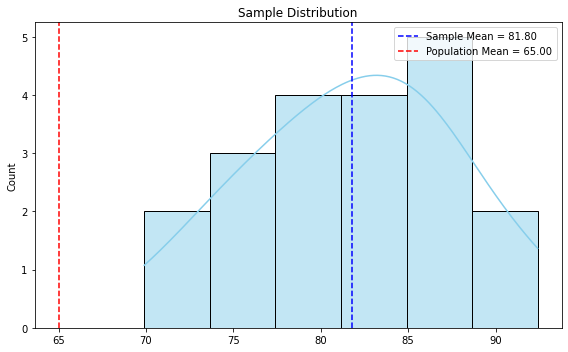

Sample Mean = 81.80
Sample Standard Deviation = 5.92
Degrees of Freedom = 19
Critical t-value = 2.0930
t-Statistic = 12.6876
p-Value = 0.0000
Conclusion: Reject the null hypothesis (significant difference)
Effect size (Cohen's d) = 2.84

Testing corrected sample:


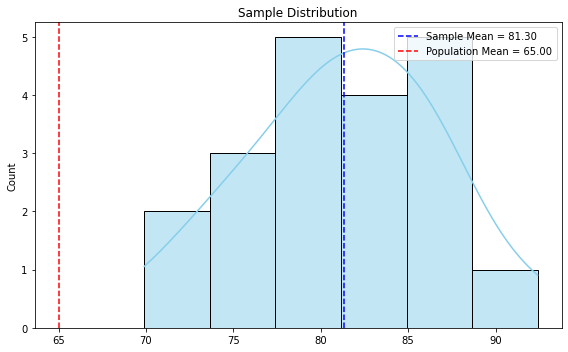

Sample Mean = 81.80
Sample Standard Deviation = 5.92
Degrees of Freedom = 19
Critical t-value = 2.0930
t-Statistic = 12.6876
p-Value = 0.0000
Conclusion: Reject the null hypothesis (significant difference)
Effect size (Cohen's d) = 2.95


In [5]:
# Effect size (Cohen's d) calculation
def effect_size(sample, popmean):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    cohen_d = (sample_mean - popmean) / sample_std
    return cohen_d
# 1. Test the initial sample
sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
                 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

popmean = 65
alpha = 0.05

print("Testing initial sample:")
t_stat, p_value = one_sample_ttest(sample_scores, popmean, alpha)
cohen_d = effect_size(sample_scores, popmean)
print(f"Effect size (Cohen's d) = {cohen_d:.2f}")

# 2. Test the corrected sample (replace the erroneous score 90.9 with 80.9)
corrected_sample_scores = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
                           78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

print("\nTesting corrected sample:")
t_stat_corrected, p_value_corrected = one_sample_ttest(corrected_sample_scores, popmean, alpha)
cohen_d_corrected = effect_size(corrected_sample_scores, popmean)
print(f"Effect size (Cohen's d) = {cohen_d_corrected:.2f}")

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 